In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
#import nn_lut_expo as nl
from keras import backend as K
import os
#import h5py

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
tf.__version__


'2.12.0'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from timeit import default_timer as timer
from tensorflow.keras.models import load_model

In [18]:
data = pd.read_csv('Multi_labeled_CAN_dataset.csv')

label_encoder = LabelEncoder()
data['ID'] = label_encoder.fit_transform(data['ID'])
data['DATA'] = label_encoder.fit_transform(data['DATA'])
X = data[['Timestamp', 'ID', 'DLC', 'DATA']].values
y = data['Class'].values

# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X.shape

(4613439, 1, 4)

In [7]:
data

Timestamp  ID  DLC    DATA  Class
0        0.000000e+00   0    8       2      1
1        2.710000e-04   7    8   41112      1
2        4.950000e-04   0    8       2      1
3        7.360000e-04   8    8  137286      1
4        9.830000e-04   0    8       2      1
...               ...  ..  ...     ...    ...
4613434  1.481193e+09  52    3    2949      3
4613435  1.481193e+09  13    8   55310      3
4613436  1.481193e+09  17    8   81285      3
4613437  1.481193e+09  21    8  354668      3
4613438  1.481193e+09  25    5  190550      3

[4613439 rows x 5 columns]

In [5]:

# Define the path to the saved Keras model file
model_file_path = 'Multiclass_model.h5'

# Load the saved Keras model
model = load_model(model_file_path)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 1, 64)          │        13,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1, 8)           │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1, 4)           │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,998 (54.68 KB)

 Trainable params: 13,996 (54.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [6]:
model.trainable_variables[6]

<KerasVariable shape=(4,), dtype=float32, path=dense_5/bias>

In [7]:
np.savez('single_test_data.npz', array1=x_test[0], array2=y_test[0])
# Load the arrays from the .npz file
loaded_data = np.load('single_test_data.npz')

# Access individual arrays by their names
loaded_x_test = loaded_data['array1']
loaded_y_test = loaded_data['array2']

# Now you can use the loaded arrays as needed
#print(loaded_x_test)
#print(loaded_y_test)


In [8]:
with open('expo_LUT.npy', 'rb') as f:
    h1 = np.load(f)
    h2 = np.load(f)
    h3 = np.load(f)
#print(h1,h2,h3)

# we'll measure the accuracy of NN_LUT results on trained value over softmax

In [20]:
# n = np.array([1.4361087, 4.2334495, 3.85742  , 4.264582 , 3.8623135, 5.329231 ,
#         4.59598  , 4.5642357, 4.0106244, 3.768467 , 4.0424323, 4.7826633,
#         3.8420782, 3.8410342, 3.978158 , 3.8407047]) ## dtype=float32

# b = np.array([3.6729612, 2.4222262, 2.6400049, 2.3553596, 2.6376493, 1.6942859,
#        2.2128122, 2.1753068, 2.5537484, 2.65736, 2.4797037, 1.9942976,
#        2.6000817, 2.602181 , 2.5191853, 2.6025882]) ##dtype=float32

# m = np.array([ 0.16392513, 0.40462586, 0.50942373, -0.27365214, 0.52273303, 0.06400099, 0.2643626, -0.18569617, 0.49074554,0.5214768,-0.30852234,
#        -0.06019293, -0.46837196, -0.50730234, -0.34195417, -0.5151364]) ## dtype=float32


# break_points  = -(b/n)
# d = np.sort(break_points, axis = 0)

In [17]:
# def linear(n1,b1,m1):
#     s = []
#     t = []
#     s.clear()
#     t.clear()
#     op = 16
#     for i in range(op):
#         a1_tmp = 0
#         a2_tmp = 0
#         b1_tmp = 0
#         b2_tmp = 0
#         a_ = 0
#         b_ = 0
#         s_tmp = 0
#         t_tmp = 0

# ### first summation for both of the terms in equation 7
#         for j in range(i+1):
#              if n1[j]>0:
#                 a1_tmp+= n1[j]
#                 #b1_tmp+= (n1[j] * (b1[j]/n1[j]))
#                 b1_tmp+= b1[j]         
#                 continue
                
# ### second summation for both of the terms in equation 7                  
#         for q in range(i+1, op):
#             if n1[q]<0:
#                 a2_tmp+= n1[q]
#                 #b2_tmp+= (n1[q] * (b1[q]/n1[q]))
#                 b2_tmp+= b1[q]
#                 continue
#         a_+= (a1_tmp + a2_tmp)  ## m*(summation of positive and negative but for weights)
#         b_+= (b1_tmp + b2_tmp)   ## m*(summation of positive and negative but for bias)
    
# ###finally calculate the value for LUT_parameters s,t   
#         s_tmp = (m1[i]*(a_)) 
#         s.append(s_tmp)
#         t_tmp = (m1[i] *(b_))    
#         t.append(t_tmp)   
#     return s,t 

In [9]:
mt = h1
ad = h2
ip = h3   #interuption_points
mt,ad,ip

(array([[ 2.5162613],
        [-0.7169426],
        [ 1.1832733],
        [ 8.997018 ],
        [-4.69066  ],
        [-5.224174 ],
        [-6.164012 ],
        [-1.2117935],
        [-3.5553658],
        [ 3.232834 ],
        [26.115318 ],
        [-1.2175279],
        [-1.510111 ],
        [-6.745086 ],
        [ 5.169953 ]], dtype=float32),
 array([[-1.9806509 ],
        [ 0.24835189],
        [ 0.11691633],
        [ 0.6672648 ],
        [-0.3756986 ],
        [-0.42847678],
        [-0.5078294 ],
        [-0.08216069],
        [-0.22059129],
        [ 0.31378916],
        [ 2.5357585 ],
        [-0.08957642],
        [-0.09770174],
        [-0.41808954],
        [ 0.56607443]], dtype=float32),
 array([[-1.8268472 ],
        [-1.0165012 ],
        [-0.4208442 ],
        [-0.09954444],
        [-0.09742394],
        [-0.0902458 ],
        [-0.08432819],
        [-0.02921857],
        [-0.02015759],
        [-0.01785303],
        [-0.01343397],
        [ 0.02471859],
        [ 0.035

In [10]:
#s, t = linear(n,b,m)
mt = np.array(mt, dtype = 'float16')
ad = np.array(ad, dtype = 'float16')
ip = np.array(ip, dtype = 'float16')
# print(loaded_s)
# print(loaded_t)
# print(loaded_d)

np.savez('mt_ad_ip.npz', array1=mt, array2=ad, array3=ip)
# Load the arrays from the .npz file
loaded_data = np.load('mt_ad_ip.npz')

# Access individual arrays by their names
loaded_mt = loaded_data['array1']
loaded_ad = loaded_data['array2']
loaded_ip = loaded_data['array3']

# Now you can use the loaded arrays as needed
# print(loaded_s)
# print(loaded_t)
# print(loaded_d)



In [12]:
# np.where(np.where())

In [13]:
def ex_LUT(x): 
    t_n = 15
    if x<ip[1]:
        #print('d1', d[1])
        return mt[0]*x + ad[0] 

        
    elif x>=ip[t_n-1]:  #value of X>= d14
        #print('d_end',d[t_n-1])
        return mt[t_n-1]*x + ad[t_n-1]
                
    else: 
        
        for i in range(1,t_n-1): # value of X>= d1 and X< d15
            if ip[i]<=x<ip[i+1]:   
               # print('di',d[i])
                return mt[i] * x + ad[i]
                break

In [20]:

# with a Sequential model

# get_2th_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[1].output])

get_2th_layer_output = tf.keras.models.Model(inputs=model.input, outputs=model.layers[2].output)

layer_output1 = get_2th_layer_output.predict(x_test)
layer_output1 = layer_output1.reshape(461344, 8)
#print(layer_output1.shape)

# ''' weights and biases from 2nd last layer'''

w_le_model = np.array(model.trainable_variables[5])
b_le_model = np.array(model.trainable_variables[6])

# reshape the array for concatenation of Wo,mn and bo, so Wo,(mn+1)
w_le_model = np.transpose(w_le_model)
b_le_model = b_le_model.reshape(4,1)## shape is now [4,1]
v = np.concatenate((w_le_model,b_le_model), axis =1)
#v  ##shape is now [4,9]  weight and bias in one array
layer_output1.shape
#print(w_le_model.shape, b_le_model.shape)
#v = np.concatenate((w_le_model,b_le_model), axis =0)


14417/14417 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step


(461344, 8)

In [21]:
#v.shape  ##shape is now [9,1]  weight and bias in one array
layer_output1[0]

array([ 0.       , 13.779412 ,  1.1152949,  0.       ,  0.       ,
       15.891149 ,  0.1751618,  0.       ], dtype=float32)

In [22]:
gru_model_input1 = []
# #extra padding for X(mn+1),1
extra = np.array((1))
extra.shape = (1,1)

##Prepare the input for the LUT function or softmax function

In [23]:
for i in layer_output1:
    i.shape = (8,1)
    u = np.concatenate((i,extra), axis =0) ##shape is (9,1)
    #print(u.shape)
    j = np.dot(v,u)
    #print(j)
    gru_model_input1.append(j)
    
med1 = np.array(gru_model_input1, dtype='float16')   
med1 = med1.reshape(461344, 4)
med1.shape


(461344, 4)

In [24]:
med2 = np.array(gru_model_input1, dtype='float32')  
med2 = med2.reshape(461344, 4)
med2.shape

(461344, 4)

In [25]:
#med1 = med1.reshape(359510, 3)
med2[0]

array([-28.594995,  -7.554305, -27.606993, -48.25091 ], dtype=float32)

In [26]:
np.savez('med1[0].npz', array1=med1[0])
# Load the arrays from the .npz file
loaded_data = np.load('med1[0].npz')

# Access individual arrays by their names
loaded_med1 = loaded_data['array1']
print(loaded_med1.dtype)
loaded_med1

float16


array([-28.6  ,  -7.555, -27.61 , -48.25 ], dtype=float16)

In [27]:
np.savez('med2[400000].npz', array2=med2[400000])
# Load the arrays from the .npz file
loaded_data = np.load('med2[400000].npz')

# Access individual arrays by their names
loaded_med2 = loaded_data['array2']
print(loaded_med2.dtype)
loaded_med2

float32


array([-12.892451,  -8.464176,  16.390799, -78.38499 ], dtype=float32)

## LUT Prediction time

In [98]:
fm = []

start0 = timer()
for i in med1[0]:
#     print(i.dtype)
    fix_3 = ex_LUT(i)      
    fm.append(np.abs(fix_3))
end0 = timer()
prediction_LUT_time = (end0-start0) *1000
print("LUT Model Prediction Time for a Single Data Point:", "{:.2f} ms".format(prediction_LUT_time))
fm

LUT Model Prediction Time for a Single Data Point: 0.29 ms


[array([73.94], dtype=float16),
 array([20.98], dtype=float16),
 array([71.44], dtype=float16),
 array([123.4], dtype=float16)]

In [55]:
# fm1 = []

# start1 = timer()
# for i in med2[0]:
# #     print(i.dtype)
#     fix_2 = ex_LUT(i)      
#     fm1.append(np.abs(fix_2))
# end1 = timer()
# prediction_LUT_time = (end1-start1) *1000
# print("LUT Model Prediction Time for a Single Data Point:", "{:.2f} ms".format(prediction_LUT_time))
# fm1

In [29]:
y_test[0]

1

In [56]:
# med1

In [102]:
final_t = []
start0 = timer()
for i in med1:
    fint = []
    for j in i:
        fix1 = ex_LUT(j)
        fint.append(fix1)
    final_t.append(fint)
end0 = timer()
soft_prediction_time0 = end0-start0
print("LUT Prediction Time for whole Test_Dataset:", "{:.2f} seconds".format(soft_prediction_time0))

LUT Prediction Time for whole Test_Dataset: 12.52 seconds


In [103]:
LUT_result_t = np.array(final_t) 
LUT_result_t[0]

array([[ -73.94],
       [ -20.98],
       [ -71.44],
       [-123.4 ]], dtype=float16)

In [104]:
for i in y_test:
    print(i)

1
0
1
0
0
0
0
1
1
0
3
0
3
3
0
0
0
0
0
0
1
0
1
0
0
0
3
0
0
3
0
0
1
0
0
0
0
0
0
0
2
1
1
2
3
0
2
0
0
0
3
2
2
2
3
3
3
0
3
2
3
0
0
0
2
0
1
3
0
3
2
1
1
0
3
0
3
0
0
3
3
1
0
2
3
3
1
3
2
0
3
3
3
0
0
3
2
0
0
3
0
0
0
1
0
3
3
3
0
0
1
0
0
0
0
2
0
3
3
2
1
3
3
0
0
0
0
2
0
1
1
0
0
0
0
1
0
2
0
0
3
0
0
0
0
1
3
0
0
0
0
0
0
0
3
0
3
3
3
0
0
2
0
2
1
3
0
0
1
3
3
0
2
0
0
0
3
3
1
0
0
0
0
3
1
0
1
0
0
3
2
3
0
0
0
0
3
1
3
0
1
0
3
0
0
0
2
3
0
0
0
1
0
2
0
0
0
2
1
3
0
0
3
1
0
0
0
0
2
0
0
2
2
0
0
3
0
3
1
0
0
1
0
0
3
0
1
3
0
0
2
0
0
2
0
2
0
0
3
2
1
2
0
0
0
0
0
0
0
0
0
0
2
2
3
3
3
0
0
1
3
0
0
3
3
3
0
1
2
2
0
1
3
2
0
0
0
0
0
2
0
3
1
1
0
0
0
0
1
0
3
0
0
3
2
0
1
0
2
1
3
1
0
0
2
0
0
3
1
0
0
2
3
2
1
0
0
0
0
2
0
1
0
0
0
0
0
0
3
1
3
1
2
0
3
0
0
1
1
0
1
0
3
1
0
1
2
0
0
1
0
0
0
0
3
1
3
0
2
0
0
3
0
0
1
0
1
2
3
0
3
0
3
1
0
0
0
2
0
0
2
3
0
3
0
0
0
0
2
0
3
2
2
3
0
0
0
1
0
3
0
3
1
3
3
1
0
0
3
0
0
1
0
2
3
0
1
1
0
0
1
0
1
1
3
0
0
0
1
1
0
0
1
0
1
0
1
3
3
0
3
0
2
3
0
3
0
3
0
0
3
0
3
3
2
3
3
3
1
1
0
0
0
0
0
3
3
3
0
0
2
0
0
0
2
3
3
1
3
1


In [105]:
predicted_t = [np.argmax(i) for i in LUT_result_t]
predicted_t

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 3,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 3,
 0,
 2,
 0,
 0,
 0,
 3,
 2,
 0,
 0,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 3,
 2,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 2,
 3,
 3,
 1,
 3,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 3,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 3,
 3,
 2,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 3,
 3,
 0,
 0,
 2,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 3,
 3,
 0,
 2,
 0,
 0,
 0,
 3,
 3,
 1,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 3,
 0,
 3,
 0,
 2,
 0,
 1,
 0,
 0,
 3,
 0,
 1,
 3,
 0,
 0,


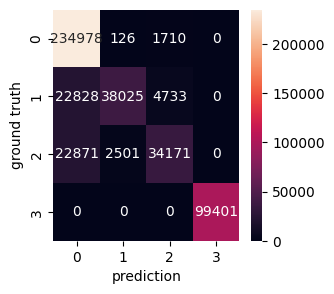

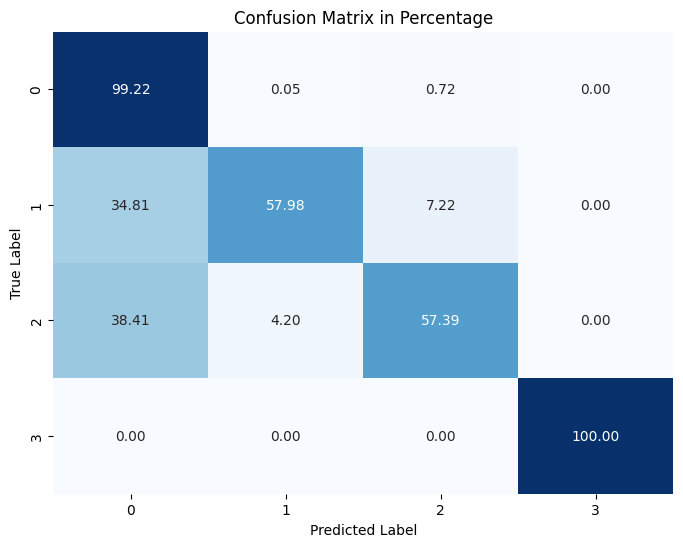

In [110]:
cmat = tf.math.confusion_matrix(labels=y_test, predictions=predicted_t)

plt.figure(figsize=(3,3))
sns.heatmap(cmat, annot=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('ground truth')



cm = tf.math.confusion_matrix(y_test, predicted_t)

# Convert EagerTensor to NumPy array
cm_np = cm.numpy()

# Row-wise normalization to get percentages
cm_percentage = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix in Percentage')
plt.show()

In [108]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predicted_t)))

# print('Precision: {:.2f}'.format(precision_score(y_test, predicted_t, average='micro')))
# print('Recall: {:.2f}'.format(recall_score(y_test, predicted_t, average='micro')))
# print('F1-score: {:.2f}\n'.format(f1_score(y_test, predicted_t, average='micro')))

# print('Macro Precision: {:.2f}'.format(precision_score(y_test, predicted_t, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(y_test, predicted_t, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, predicted_t, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, predicted_t, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, predicted_t, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, predicted_t, average='weighted')))


Accuracy: 0.88

Weighted Precision: 0.89
Weighted Recall: 0.88
Weighted F1-score: 0.87


In [111]:
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())



## SOFTMAX Prediction time

In [166]:
soft_ = []
start1 = timer()
for i in med1[0]:
#     print(i)
    fix1 = softmax(j)
        #print(fix1)
    soft_.append(fix1)
    
end1 = timer()        
sfm = np.array(soft_) 

soft_prediction_time = (end1 - start1)*1000

print("Softmax Model Prediction Time for a Single Data Point:", "{:.2f} ms".format(soft_prediction_time))

Softmax Model Prediction Time for a Single Data Point: 0.34 ms


C:\Users\routs\AppData\Local\Temp\ipykernel_23364\1194603477.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return(np.exp(x)/np.exp(x).sum())


In [96]:
# soft_ = []
# med1.shape

In [196]:
soft_ = []
start3 = timer()
for i in med1:
    sof_ = []
    for j in i:
        fix1 = softmax(j)
        sof_.append(fix1)
    soft_.append(sof_)
end3 = timer()        
sfm = np.array(soft_) 

soft_prediction_time1 = end3 - start3
print("Softmax Model Prediction Time for whole Test_Dataset:", "{:.2f} seconds".format(soft_prediction_time1))

C:\Users\routs\AppData\Local\Temp\ipykernel_23364\1194603477.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return(np.exp(x)/np.exp(x).sum())
C:\Users\routs\AppData\Local\Temp\ipykernel_23364\1194603477.py:2: RuntimeWarning: overflow encountered in exp
  return(np.exp(x)/np.exp(x).sum())


Softmax Model Prediction Time for whole Test_Dataset: 10.21 seconds


## time improvement of using LUT on TFLite fp16 model over using softmax for single data point

In [73]:
improved_time = prediction_le_fp16_time + prediction_LUT_time - soft_prediction_time
print("Improved Prediction Time for a Single Data Point:", "{:.2f} ms".format(improved_time))

Improved Prediction Time for a Single Data Point: 0.35 ms


In [74]:
sfm_t = [np.argmax(i) for i in sfm]
sfm_t

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [79]:
cmat = tf.math.confusion_matrix(labels=y_test, predictions=sfm)

plt.figure(figsize=(5,5))
sns.heatmap(cmat, annot=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('ground truth')

InvalidArgumentError: {{function_node __wrapped__Pack_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [10000] != values[1].shape = [10000,10] [Op:Pack] name: stack

In [ ]:
for i in med:
    print(i)

In [ ]:
# sfm_test = [np.argmax(i) for i in predicted_sfm_test]
# cmat = tf.math.confusion_matrix(labels=y_train[0], predictions=predicted)

# plt.figure(figsize=(5,5))
# sns.heatmap(cmat, annot=True, fmt='d')
# plt.xlabel('prediction')
# plt.ylabel('ground truth')

# softmax result

In [68]:
predicted_sfm = le_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0444 - accuracy: 0.9907


In [108]:
x_test[0].shape

(28, 28)

In [109]:
x_test[0].reshape([1,28,28,1])

le_model.predict(x_test[0])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/layer1/Relu' defined at (most recent call last):
    File "c:\users\user\appdata\local\programs\python\python38\lib\runpy.py", line 192, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\users\user\appdata\local\programs\python\python38\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\users\user\appdata\local\programs\python\python38\lib\asyncio\base_events.py", line 563, in run_forever
      self._run_once()
    File "c:\users\user\appdata\local\programs\python\python38\lib\asyncio\base_events.py", line 1844, in _run_once
      handle._run()
    File "c:\users\user\appdata\local\programs\python\python38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_14928\2842372081.py", line 1, in <module>
      le_model.predict(x_test[0])
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential/layer1/Relu'
convolution input must be 4-dimensional: [28,28]
	 [[{{node sequential/layer1/Relu}}]] [Op:__inference_predict_function_75599]

In [ ]:
sfm = [np.argmax(i) for i in predicted_sfm]
cmat = tf.math.confusion_matrix(labels=y_test, predictions=sfm)

plt.figure(figsize=(5,5))
sns.heatmap(cmat, annot=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('ground truth')